### Filtrado de señales digitales con Python: Por Frecuencia
En este ejemplo usaremos señales de Electro Encefalogramas para filtrarlas
Las señales EEG fueron recolectadas 200 muestras a 200Hz

In [ ]:
!pip install pandas pyarrow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal

In [3]:
eeg = pd.read_parquet('3911565283.parquet', engine = 'pyarrow')
eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,9.210000,-47.459999,15.100000,8.22,-16.900000,-22.99,-25.820000,-10.09,28.370001,-3.01,-27.299999,101.040001,35.110001,14.54,18.33,28.540001,44.090000,69.650002,30.74,171.679993
1,-3.590000,-30.290001,32.380001,10.80,-68.980003,-21.60,-15.080000,-9.21,26.360001,-8.98,-32.279999,95.800003,26.389999,4.82,10.54,20.559999,32.060001,59.439999,23.32,178.279999
2,-26.040001,-60.070000,2.370000,-10.15,-34.689999,-31.40,-31.920000,-26.98,-1.940000,-28.77,-49.770000,73.449997,-3.680000,-17.32,-16.15,-8.270000,5.330000,45.180000,9.49,306.739990
3,-3.040000,-36.250000,29.559999,14.53,-14.010000,-11.90,-14.230000,-6.31,26.040001,-2.77,-25.030001,91.010002,22.610001,6.90,9.93,15.480000,33.580002,69.620003,31.01,223.259995
4,-4.630000,-20.160000,25.190001,1.19,-44.580002,-23.51,-30.709999,-17.60,25.420000,-8.86,-33.959999,89.449997,19.440001,-2.08,6.11,8.380000,24.180000,55.869999,19.91,170.759995


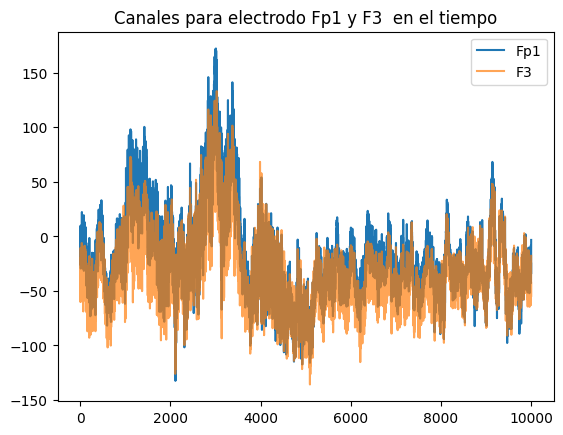

In [4]:
eeg['Fp1'].plot(label = 'Fp1')
eeg['F3'].plot(label = 'F3',alpha = 0.7)
plt.title('Canales para electrodo Fp1 y F3  en el tiempo')
plt.legend()

Zoom en la señal de EEG, observar las primeras muestras

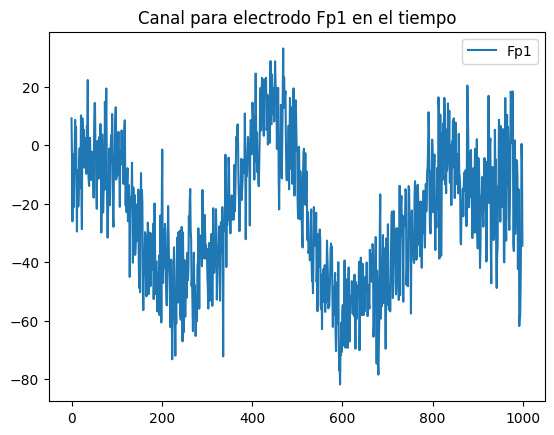

In [5]:
eeg['Fp1'][:1000].plot(label = 'Fp1')   
plt.title('Canal para electrodo Fp1 en el tiempo')
plt.legend()

### Filtro pasa-bajas (2Hz)
- Crear el filtro pasa bajas usando SciPy, con un filtro Butterworth
- darle al filtro la señal para crear una nueva filtrada
Argumentos del Filtro:
- Un filtro de orden 4 me determina que tan escalonada se la señal de corte
- la frecuencia de corte a 2Hz
- La salida de la señal
- Y la frecuencia de lectura

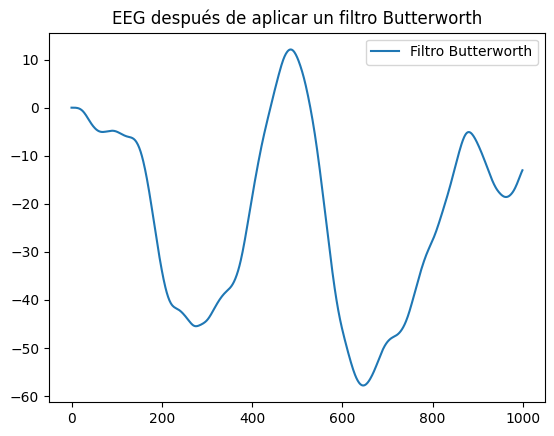

In [11]:
butter_filter = signal.butter(N = 4, Wn = 2, output = 'sos', fs = 200)
eeg_data = eeg['Fp1'][:1000].copy()
low_pass_filtered_eeg = signal.sosfilt(butter_filter, eeg_data)
plt.plot(low_pass_filtered_eeg, label = 'Filtro Butterworth')
plt.title('EEG después de aplicar un filtro Butterworth')
plt.legend()

Filtro pasa bajas (corte a 20HZ)

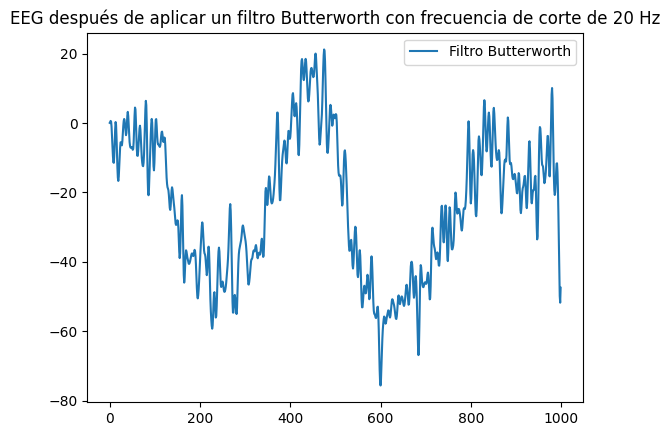

In [7]:
butter_filter = signal.butter(4, Wn = 20, output = 'sos', fs=200)
eeg_data = eeg['Fp1'][:1000].copy()
low_pass_filtered_eeg = signal.sosfilt(butter_filter, eeg_data)
plt.plot(low_pass_filtered_eeg, label = 'Filtro Butterworth')
plt.title('EEG después de aplicar un filtro Butterworth con frecuencia de corte de 20 Hz')
plt.legend()    

Filtro Pasa Alta (corte 2Hz)

Text(0.5, 1.0, 'EEG después de aplicar un filtro Butterworth de paso alto con frecuencia de corte de 2 Hz')

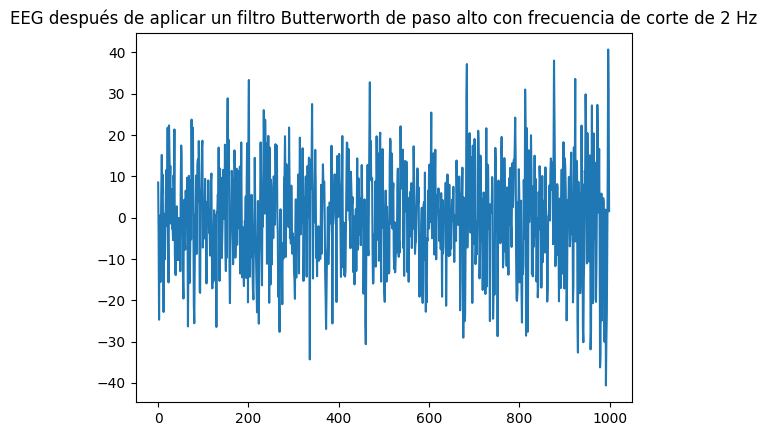

In [8]:
butter_filter = signal.butter(4,Wn = 2, output= 'sos', fs=200, btype ='highpass')
eeg_data = eeg['Fp1'][:1000].copy()
high_pass_filtered_eeg = signal.sosfilt(butter_filter, eeg_data)    
plt.plot(high_pass_filtered_eeg)
plt.title('EEG después de aplicar un filtro Butterworth de paso alto con frecuencia de corte de 2 Hz')  


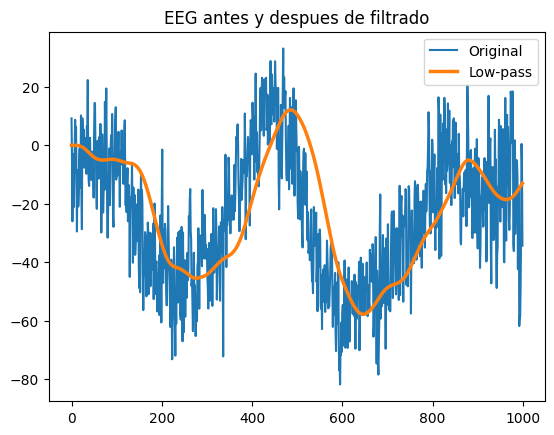

In [12]:
plt.plot(eeg_data, label='Original')
plt.plot(low_pass_filtered_eeg, label = 'Low-pass', linewidth=2.5)
plt.title('EEG antes y despues de filtrado')
plt.legend()